In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [100]:
df = pd.read_csv('data/9f1af44d-41e8-43ac-ae56-203cdd798649-labelled.csv')

In [101]:
features_cols = ['GridRows', 'GridColumns', 'NumOfAgents', 'NumOfObstacles', 'ObstacleDensity',
            'AvgDistanceToGoal', 'MaxDistanceToGoal', 'MinDistanceToGoal', 'AvgStartDistances', 'AvgGoalDistances',
            'PointsAtSPRatio']

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(0, 100))

x = df[['A*+OD+ID Runtime']].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=['A*+OD+ID Runtime'], index = df.index)
df['A*+OD+ID Runtime'] = df_temp


In [102]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split  
# 'ICTS 2RE Runtime']
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(df[features_cols], df['A*+OD+ID Runtime'], test_size=0.3) 

In [103]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1727, 11), (1727,), (741, 11), (741,))

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)

# GradientBoostingClassifier(criterion=’friedman_mse’, init=None,
#  learning_rate=0.1, loss=’deviance’, max_depth=3,
#  max_features=None, max_leaf_nodes=None,
#  min_impurity_split=1e-07, min_samples_leaf=1,
#  min_samples_split=2, min_weight_fraction_leaf=0.0,
#  n_estimators=100, presort=’auto’, random_state=None,
#  subsample=1.0, verbose=0, warm_start=False)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 1962617533.6333


In [106]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, clf.predict(X_test))  

0.5864314345612089

In [107]:
from sklearn.metrics import r2_score
r2_score(y_test, clf.predict(X_test))

0.5864290392063847

['GridColumns' 'GridRows' 'MaxDistanceToGoal' 'NumOfObstacles'
 'MinDistanceToGoal' 'PointsAtSPRatio' 'ObstacleDensity'
 'AvgDistanceToGoal' 'AvgStartDistances' 'AvgGoalDistances' 'NumOfAgents']
[ 1  0  6  3  7 10  4  5  8  9  2]


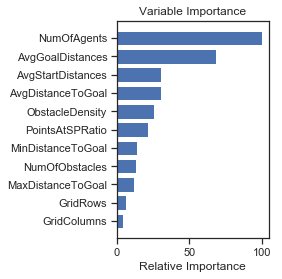

In [108]:
import numpy as np
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
print(np.array(features_cols)[sorted_idx])
print(sorted_idx)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(features_cols)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
df = pd.read_csv('data/9f1af44d-41e8-43ac-ae56-203cdd798649-labelled-only-features.csv')